# Laboratorio 1

Profesor: Joaquín Fontbona

Auxiliares: Bruno Hernández, Pablo Araya

Integrantes: Sebastián Rojas, Diego Dominguez, Branco Paineman

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #sirve para graficar
from scipy.stats import dirichlet,beta,norm,uniform,chi2,bernoulli, poisson, binom, geom
import random as rd
import time
import math
import pandas as pd

## Pregunta 1

### 1)

In [2]:
def uniforme(n, M):
    if M==1:
        return np.random.uniform(0,1,n)
    elif M==2:
        return uniform.rvs(size=n)
    elif M==3:
        X=np.zeros(n)
        for i in range(len(X)):
            X[i]=rd.uniform(0,1)
        return X

### 2)

Text(0.5, 1.0, 'Histograma de una muestra de 1000000 uniformes usando Numpy')

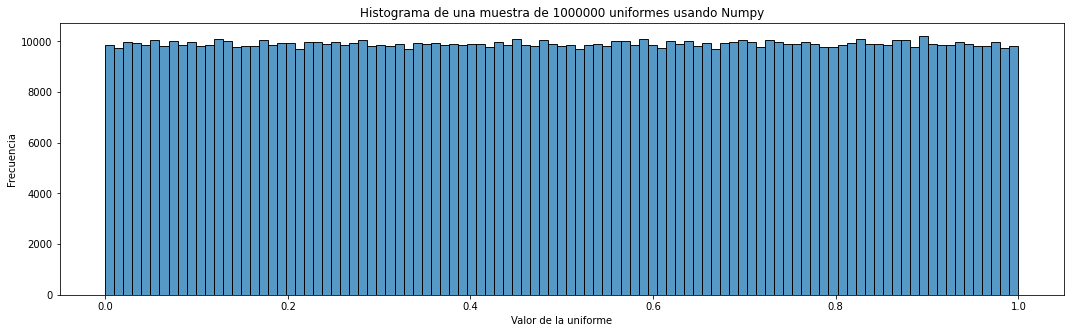

In [3]:
fig, axs = plt.subplots(1, 1, figsize = (18,5))
X_N=uniforme(1000000,1)
sns.histplot(X_N, ax = axs)
plt.xlabel('Valor de la uniforme')
plt.ylabel('Frecuencia')
plt.title('Histograma de una muestra de 1000000 uniformes usando Numpy')

Text(0.5, 1.0, 'Histograma de una muestra de 1000000 uniformes usando Scipy')

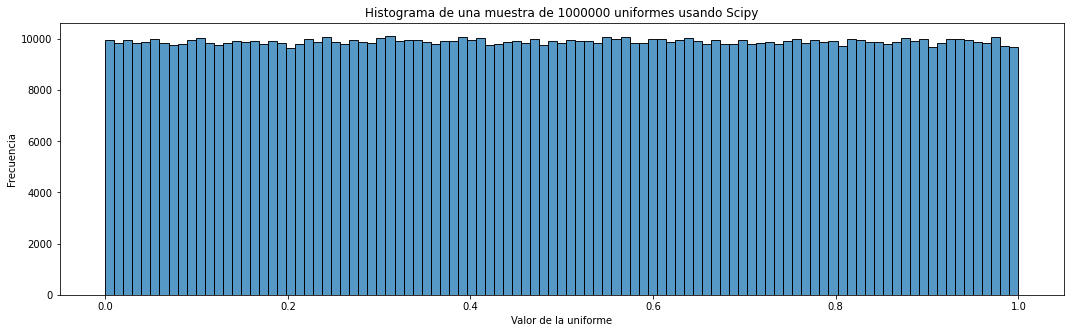

In [4]:
fig, axs = plt.subplots(1, 1, figsize = (18,5))
X_S=uniforme(1000000,2)
sns.histplot(X_S, ax = axs)
plt.xlabel('Valor de la uniforme')
plt.ylabel('Frecuencia')
plt.title('Histograma de una muestra de 1000000 uniformes usando Scipy')

Text(0.5, 1.0, 'Histograma de una muestra de 1000000 uniformes usando Random')

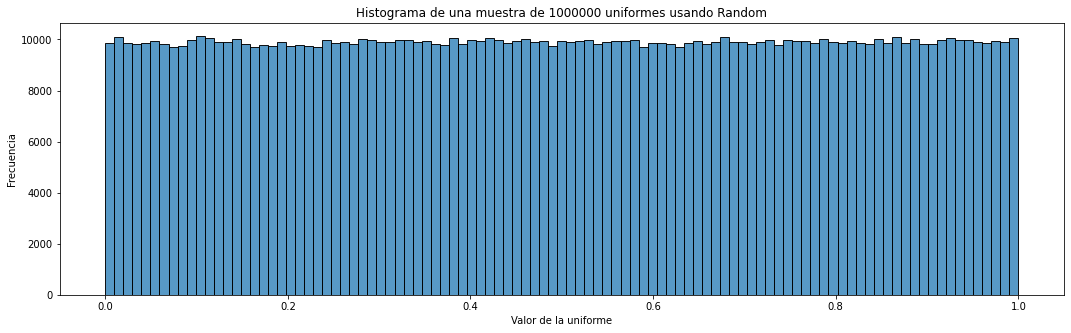

In [5]:
fig, axs = plt.subplots(1, 1, figsize = (18,5))
X_R=uniforme(1000000,3)
sns.histplot(X_R, ax = axs)
plt.xlabel('Valor de la uniforme')
plt.ylabel('Frecuencia')
plt.title('Histograma de una muestra de 1000000 uniformes usando Random')

In [6]:
Medias = pd.DataFrame(np.array([['Numpy','%.5f'%(np.mean(X_N))], ['Scipy','%.5f'%(np.mean(X_S))],['Random','%.5f'%(np.mean(X_R))]]), 
                  columns=['Método','Medias'])
Medias

,Método,Medias
0,Numpy,0.50012
1,Scipy,0.49997
2,Random,0.50053


Se observa que los valores de cada simulación de 1.000.000 de uniformes tienen la misma frecuencia, dando como resultado medias de alrededor de 0.5 para cada método. Esto es gracias a la Ley de los grandes números, la cuál establece que el valor esperado de una sucesión de variables uniformes[0,1] es el promedio de estas.

### 3)

In [7]:
def muestra(n,m,M):
    tiempo=np.zeros(m)
    Muestra=np.zeros(m,dtype=object)
    for i in range(m):
        t0 = time.time_ns()
        Muestra[i]=uniforme(n,M)
        t1 = time.time_ns()
        tiempo[i]=t1-t0
    return Muestra,tiempo

Media: 59837.0
Varianza: 254999477931.0


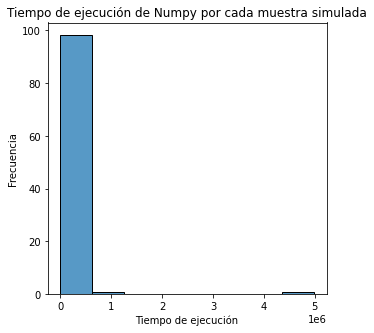

In [8]:
np_u=muestra(1000,100,1)
fig, axs = plt.subplots(1, 1, figsize = (5,5))
sns.histplot(np_u[1], ax = axs)
media_n,var_n=np.mean(np_u[1]),np.var(np_u[1])
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo de ejecución')
plt.title('Tiempo de ejecución de Numpy por cada muestra simulada')
print('Media: '+str(media_n))
print('Varianza: '+str(var_n))

Media: 79818.0
Varianza: 73267953876.0


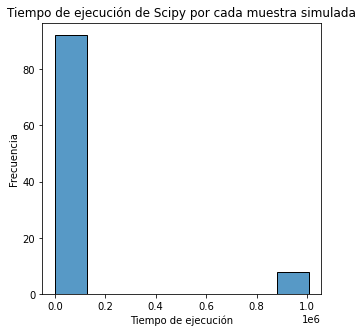

In [9]:
sci_u=muestra(1000,100,2)
fig, axs = plt.subplots(1, 1, figsize = (5,5))
sns.histplot(sci_u[1], ax = axs)
media_s,var_s=np.mean(sci_u[1]),np.var(sci_u[1])
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo de ejecución')
plt.title('Tiempo de ejecución de Scipy por cada muestra simulada')
print('Media: '+str(media_s))
print('Varianza: '+str(var_s))

Media: 378988.0
Varianza: 234347415656.0


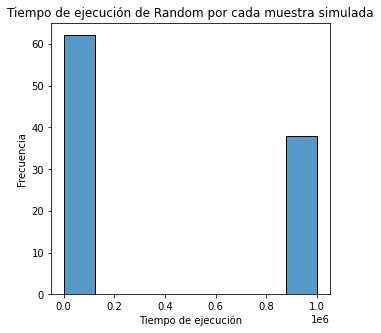

In [10]:
rand_u=muestra(1000,100,3)
fig, axs = plt.subplots(1, 1, figsize = (5,5))
sns.histplot(rand_u[1], ax = axs)
media_r,var_r=np.mean(rand_u[1]),np.var(rand_u[1])
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo de ejecución')
plt.title('Tiempo de ejecución de Random por cada muestra simulada')
print('Media: '+str(media_r))
print('Varianza: '+str(var_r))

In [11]:
#Media y Varianza de los tiempos de ejecución
df = pd.DataFrame(np.array([['Numpy',int(media_n),int(var_n)], ['Scipy', int(media_s),int(var_s)],['Random', int(media_r),int(var_r)]]), 
                  columns=['Método','Media','Varianza'])

df

,Método,Media,Varianza
0,Numpy,59837,254999477931
1,Scipy,79818,73267953876
2,Random,378988,234347415656


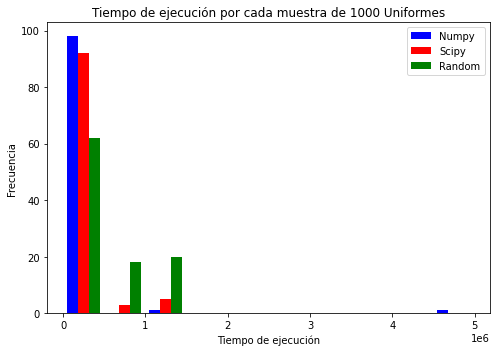

In [12]:
colors=['b','r','g']
fig, ax1 = plt.subplots(1, 1, figsize = (7,5))
ax1.hist([np_u[1],sci_u[1],rand_u[1]],color=colors,label=['Numpy','Scipy','Random'])
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo de ejecución')
plt.title('Tiempo de ejecución por cada muestra de 1000 Uniformes')
ax1.legend()
plt.tight_layout()
plt.show()

En los tres métodos se puede observar que el tiempo de ejecución por simular una muestra de 1000 uniformes[0,1], es 0 en la mayoría de los casos. El resto de timepos pueden ser considerados valores atípicos que se deben a las solcitudes de memoria del computador.

### 4)

**¿Cuál es el mejor método a utilizar?**

Se puede observar que al utilizar Numpy como método de simulación, se obtiene una menor media y varianza de tiempo de ejecución en comparación a los otros métodos  
Además en los gráficos se puede observar que este método es el que posee menor cantidad de outliers, esto significa que el computador no usa tanta memoria al utilizar numpy.
Por lo tanto, se concluye que con la librería Numpy se consigue el mejor método de simulación.  

### 5)

#### a) Bernoulli($\rho$)

Para simular una Bernoulli con Numpy, basta utilizar la función Binomial que viene integrada en esta librería con parametro n=1.

Por otro lado, para realizar la simulación de una variable $X \sim Ber(\rho)$ con $\rho \in (0,1)$ mediante Random, se puede utilizar variables uniformes[0,1] de tal forma que $X = \mathbb{1}$<sub>[0,$\rho$]</sub>$(U)$, con $U \sim Uniforme[0,1]$.

In [13]:
def f_bernoulli(n, M, p):
    if M==1:
        return np.random.binomial(1,p,n) #Arreglar
    elif M==2:
        return bernoulli.rvs(p, size=n) 
    elif M==3: #Arreglar
        X=np.zeros(n)
        for i in range(len(X)):
            U=rd.uniform(0,1)
            if U<=p:
                X[i]=1
    return X

In [14]:
# muestra_ber: (int, float, int, int) -> (array, array)
# Recibe n, que es la cantidad de bernoulli's a generar,
# p es el parámetro de la distribución, m es la cantidad de muestras a simular,
# M es el método a recibir. 

def muestra_ber(n,p,m,M):
    tiempo=np.zeros(m) #Arreglo que guarda los tiempos
    Muestra=np.zeros(m,dtype=object) #Arreglo que guarda las muestras
    for i in range(m):
        t0 = time.time_ns()
        Muestra[i]=f_bernoulli(n,M,p) #Se guarda la muestra
        t1 = time.time_ns()
        tiempo[i]=t1-t0 #Se calcula el tiempo y se guarda
    return Muestra,tiempo

In [15]:
np_ber=muestra_ber(1000,0.7,100,1)
media_n_ber,var_n_ber=np.mean(np_ber[1]),np.var(np_ber[1])
print('Media: '+str(media_n_ber))
print('Varianza: '+str(var_n_ber))

Media: 29445.0
Varianza: 28049010875.0


In [16]:
sci_ber=muestra_ber(1000,0.7,100,2)
media_s_ber,var_s_ber=np.mean(sci_ber[1]),np.var(sci_ber[1])
print('Media: '+str(media_s_ber))
print('Varianza: '+str(var_s_ber))

Media: 109708.0
Varianza: 97381049936.0


In [17]:
rand_ber=muestra_ber(1000,0.7,100,3)
media_r_ber,var_r_ber=np.mean(rand_ber[1]),np.var(rand_ber[1])
print('Media: '+str(media_r_ber))
print('Varianza: '+str(var_r_ber))

Media: 448802.0
Varianza: 266101456996.0


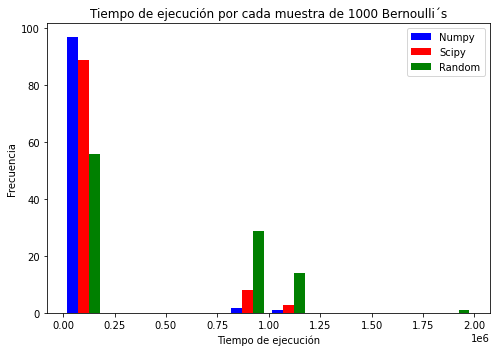

In [18]:
colors=['b','r','g']
fig, ax1 = plt.subplots(1, 1, figsize = (7,5))
ax1.hist([np_ber[1],sci_ber[1],rand_ber[1]],color=colors,label=['Numpy','Scipy','Random'])
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo de ejecución')
plt.title('Tiempo de ejecución por cada muestra de 1000 Bernoulli´s')
ax1.legend()
plt.tight_layout()
plt.show()

#### b) Binomial($\rho$, N)

La simulación de una variable aleatoria $X \sim Bin(\rho, N)$, con $\rho \in (0,1)$, $N\in\mathbb{N}$, se puede conseguir mediante la suma de las siguientes indicatrices: 

$X = \sum_{i=1}^{N}\mathbb{1}$<sub>[0,$\rho$]</sub>$(U_{i})$ con $U_{i} \sim Uniforme[0,1]$.

In [19]:
def binomial(n, M, p, N):
    if M==1:
        return np.random.binomial(N,p,n) #Arreglar
    elif M==2:
        return binom.rvs(N, p, size=n) 
    elif M==3:
        X=np.zeros(n)  #Arreglar
        for i in range(len(X)):
            B=np.zeros(N)
            for j in range(N):
                U=rd.uniform(0,1)
                if U<=p:
                    B[j]=1
            X[i]=sum(B)
    return X

In [20]:
# muestra_bin: (int, float,int, int, int) -> (array, array)
# Recibe n, que es la cantidad de binomiales a generar,
# p y N son los parámetros de la distribución, 
# m es la cantidad de muestras a simular y M es el método a recibir. 

def muestra_bin(n,p,N,m,M):
    tiempo=np.zeros(m) #Arreglo que guarda los tiempos
    Muestra=np.zeros(m,dtype=object) #Arreglo que guarda las muestras
    for i in range(m):
        t0 = time.time_ns()
        Muestra[i]=binomial(n,M,p,N) #Se guarda la muestra
        t1 = time.time_ns()
        tiempo[i]=t1-t0 #Se calcula el tiempo y se guarda
    return Muestra,tiempo

In [21]:
np_bin=muestra_bin(1000,0.7,10,100,1)
media_n_bin,var_n_bin=np.mean(np_bin[1]),np.var(np_bin[1])
print('Media: '+str(media_n_bin))
print('Varianza: '+str(var_n_bin))

Media: 59839.0
Varianza: 56112422179.0


In [22]:
sci_bin=muestra_bin(1000,0.7,10,100,2)
media_s_bin,var_s_bin=np.mean(sci_bin[1]),np.var(sci_bin[1])
print('Media: '+str(media_s_bin))
print('Varianza: '+str(var_s_bin))

Media: 139634.0
Varianza: 139663514044.0


In [23]:
rand_bin=muestra_bin(1000,0.7,20,100,3)
media_r_bin,var_r_bin=np.mean(rand_bin[1]),np.var(rand_bin[1])
print('Media: '+str(media_r_bin))
print('Varianza: '+str(var_r_bin))

Media: 11928618.0
Varianza: 2044716663676.0


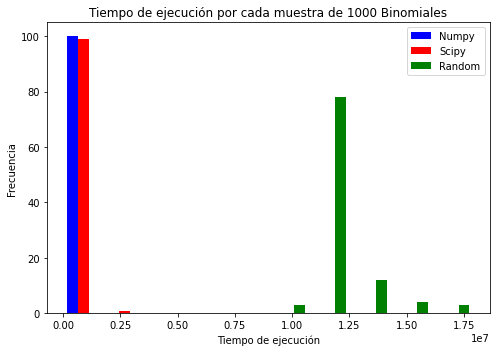

In [24]:
colors=['b','r','g']
fig, ax1 = plt.subplots(1, 1, figsize = (7,5))
ax1.hist([np_bin[1],sci_bin[1],rand_bin[1]],color=colors,label=['Numpy','Scipy','Random'])
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo de ejecución')
plt.title('Tiempo de ejecución por cada muestra de 1000 Binomiales')
ax1.legend()
plt.tight_layout()
plt.show()

#### c) Geométrica($\rho$)

Para simular una variable $X \sim Geo(\rho)$ con $\rho \in (0,1)$, basta simular variables uniformes[0,1] reiteradas veces hasta encontrar el primer instante en el valor de la uniforme sea menor o igaul a $\rho$. Esto es: $X = inf\{k\geq1 :U_{k}\leq\rho\}$

In [25]:
def geometrica(n, M, p):
    if M==1:
        return np.random.geometric(p,size=n)
    elif M==2:
        return geom.rvs(p, size=n) 
    elif M==3:
        X=np.zeros(n)  #Arreglar
        for i in range(len(X)):
            contar=1
            U=rd.uniform(0,1)
            while U>p:
                U=rd.uniform(0,1)
                contar+=1
            X[i]=contar
    return X

In [26]:
# muestra_geo: (int, float, int, int) -> (array, array)
# Recibe n, que es la cantidad de uniformes a generar,
# p es el parámetro de la distribución, m es la cantidad de muestras a simular,
# M es el método a recibir. 

def muestra_geo(n,p,m,M):
    tiempo=np.zeros(m) #Arreglo que guarda los tiempos
    Muestra=np.zeros(m,dtype=object) #Arreglo que guarda las muestras
    for i in range(m):
        t0 = time.time_ns()
        Muestra[i]=geometrica(n,M,p) #Se guarda la muestra
        t1 = time.time_ns()
        tiempo[i]=t1-t0 #Se calcula el tiempo y se guarda
    return Muestra,tiempo

In [27]:
np_geo=muestra_geo(1000,0.7,100,1)
media_n_g,var_n_g=np.mean(np_geo[1]),np.var(np_geo[1])
print('Media: '+str(media_n_g))
print('Varianza: '+str(var_n_g))

Media: 49545.0
Varianza: 65897642075.0


In [28]:
sci_geo=muestra_geo(10000,0.7,100,2)
media_s_g,var_s_g=np.mean(sci_geo[1]),np.var(sci_geo[1])
print('Media: '+str(media_s_g))
print('Varianza: '+str(var_s_g))

Media: 369315.0
Varianza: 252264514675.0


In [29]:
rand_geo=muestra_geo(10000,0.7,100,3)
media_r_g,var_r_g=np.mean(rand_geo[1]),np.var(rand_geo[1])
print('Media: '+str(media_r_g))
print('Varianza: '+str(var_r_g))

Media: 5794824.0
Varianza: 769848151824.0


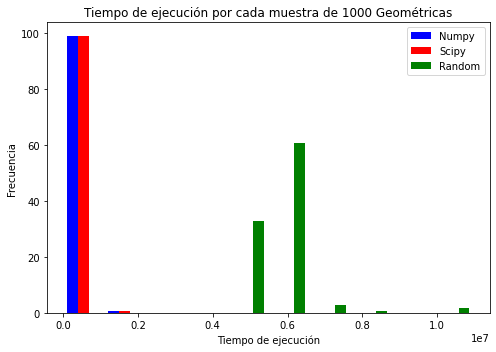

In [30]:
colors=['b','r','g']
fig, ax1 = plt.subplots(1, 1, figsize = (7,5))
ax1.hist([np_geo[1],sci_geo[1],rand_geo[1]],color=colors,label=['Numpy','Scipy','Random'])
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo de ejecución')
plt.title('Tiempo de ejecución por cada muestra de 1000 Geométricas')
ax1.legend()
plt.tight_layout()
plt.show()

In [31]:
df_1 = pd.DataFrame(np.array([[int(media_n_ber),int(var_n_ber)], [int(media_s_ber),int(var_s_ber)],
                              [int(media_r_ber),int(var_r_ber)]]), columns=['Media','Varianza'])

df_2 = pd.DataFrame(np.array([[int(media_n_bin),int(var_n_bin)], [int(media_s_bin),int(var_s_bin)],
                              [int(media_r_bin),int(var_r_bin)]]), columns=['Media','Varianza'])

df_3 = pd.DataFrame(np.array([[int(media_n_g),int(var_n_g)], [int(media_s_g),int(var_s_g)],
                              [int(media_r_g),int(var_r_g)]]), columns=['Media','Varianza'])

met = pd.DataFrame(np.array(['Numpy', 'Scipy', 'Random']), columns=['Métodos'])

In [32]:
pd.concat([met.reset_index(drop=1), df_1.reset_index(drop=1).add_suffix('_Bernoulli'),
            df_2.reset_index(drop=1).add_suffix('_Binomial'),df_3.reset_index(drop=1).add_suffix('_Geométrica')], axis=1).fillna('')

,Métodos,Media_Bernoulli,Varianza_Bernoulli,Media_Binomial,Varianza_Binomial,Media_Geométrica,Varianza_Geométrica
0,Numpy,29445,28049010875,59839,56112422179,49545,65897642075
1,Scipy,109708,97381049936,139634,139663514044,369315,252264514675
2,Random,448802,266101456996,11928618,2044716663676,5794824,769848151824


Se observa que el método que utiliza numpy para simular las variables aleatorias, posee una menor media y varianza de tiempo de ejecución en comparación al resto. Y al igual que en el caso de las variables uniformes, de los gráficos se puede ver que el computador requiere menos memoria al usar numpy. 

### 6)

**¿Qué son los números pseudoaleatorios?**

Los números pseudosaleatorios son números generados de manera secuencial mediante un algoritmo determinista, es decir, se generan al aplicar iterativamente funciones a partir de un número inicial (semilla).

En Python, la funcion random.radom() genera números pseudoaleatorios uniformes[0, 1] gracias al generador Mersenne Twister, el cuál produce números de tipo float con una precisión de 53 bits y un período de $2$$^1$$^9$$^9$$^3$$^7-1$, esto es el tiempo que una secuencia de números tarda en repetirse.  
Es posible cambiar el valor de la semilla gracias a la función random.seed(), que por  defecto utiliza la hora del sistema como valor inicial, pero puede recibir enteros que reemplazarán esta semilla. 

## Pregunta 2
El objetivo de esta pregunta es calcular numericamente $I= \frac{\pi}{4}=\int_{0}^{1} \sqrt{1-x^2} \,dx=\iint_{0}^{1} 1_{x^{2}+y^{2}\leq 1} \,dx\,dy $ usando dos metodos distintos de Monte carlo.

### a) Calculo de varianzas:
En el siguiente inciso se calculara de manera teorica las varianzas de las variables aleatoreas $X= \sqrt{1-U^{2}}$ con $U$ una variable uniforme [0,1] y $Z=1_{U_{1}^{2}+U_{2}^{2}\leq 1}$ donde $U_{1}$ y $U_{2}$ son igualmente uniformes [0,1], dado que se conoce el valor de $I=E(X)=E(Z)=\frac{\pi}{4}$:

En efecto para X:
\begin{equation}
Var(X)=E(X^{2})-E(X)^{2}=E(1-U^{2})-\frac{\pi^{2}}{16}=\frac{2}{3}-\frac{\pi^{2}}{16}\approx0.0498
\end{equation}

Para Z:
\begin{equation}
Var(Z)=E(1_{U_{1}^{2}+U_{2}^{2}\leq 1}^{2})-E(Z)^{2}=E(1_{U_{1}^{2}+U_{2}^{2}\leq 1})-\frac{\pi^{2}}{16}=\frac{\pi}{4}-\frac{\pi^{2}}{16}\approx0.1685
\end{equation}

En lo que sigue se programaran las variables aleatoreas X,Z y la funcion varianza:

In [33]:
def X(n):
    U=uniforme(n,1)
    X_=np.sqrt(1-U**2)
    return X_

def Z(n):
    U1=uniforme(n,1)
    U2=uniforme(n,1)
    U=U1**2+U2**2
    Z_=np.where(U<=1,1,0)
    return Z_

#Varianza Simulada
def var(U):
    x_bar=np.mean(U)
    Y=(U-x_bar)**2
    return sum(Y)/(len(U)-1)
    

Se crea una funcion que grafica las varianzas de X y Z para distintos n's de tal forma que entrega el valor de la varianza de ambas variables aleatoreas y el n maximo para el cual el error entre la estimacion y el resultado teorico sea de un $1\%$

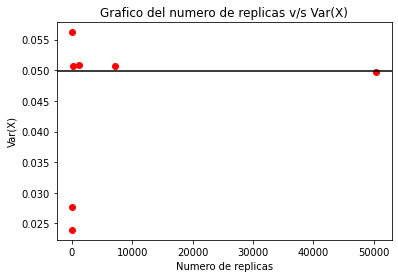

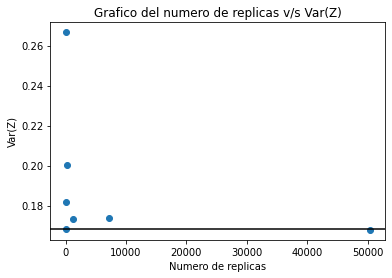

Varianza estimada de X:0.0496 Varianza estimada de z:0.1678 Valor estimado de n:50400


In [34]:
import numpy as np
import matplotlib.pyplot as plt
def plot_n():
    q=10
    P_varx=[]
    P_varz=[]
    n=[]
    for i in range(2,12):
        var_X=var(X(q))
        var_Z=var(Z(q))
        P_varx.append(var_X)
        P_varz.append(var_Z)
        n.append(q)
        b1=int(-0.01<=(var_X-0.0498)/0.0498<=0.01)
        b2=int(-0.01<=(var_Z-0.1685)/0.1685<=0.01)
        if b1 and b2:
            q_max=q
            break
        else:
            q=q*i
    plt.scatter(n,P_varx,color='red')
    plt.xlabel("Numero de replicas")
    plt.ylabel("Var(X)")
    plt.title("Grafico del numero de replicas v/s Var(X)")
    plt.axhline(0.0498,color='k')
    plt.show()
    plt.scatter(n,P_varz)
    plt.axhline(0.1685,color='k')
    plt.xlabel("Numero de replicas")
    plt.ylabel("Var(Z)")
    plt.title("Grafico del numero de replicas v/s Var(Z)")
    plt.show()
    return P_varx[-1],P_varz[-1],q_max

a,b,c=plot_n()
print('Varianza estimada de X:'+str(np.around(a,4)),'Varianza estimada de z:'+str(np.around(b,4)),'Valor estimado de n:'+str(c))



En el primer gráfico se observa que al aumentar el número de réplicas, la varianza de X tiende a 0.5 , en cambio, la varianza para Z se acerca a 0.17

### b)
En lo que sigue  se calculan la cantidad de muestras necesarias con tal de aproximar I con un error de un $0.1,0.01,0.001$ y probabilidad de un $90\%,95\%,99\%$ respectivamente, a partir de la formula:

$n=\frac{\sigma^{2}Z_{\frac{\alpha}{2}}^{2}}{e^{2}}$

Donde:

e: es el error al cuadrado.

$\sigma^{2}$:es la desviacion estandar Teorica

$Z_{\frac{\alpha}{2}}$:Valor asociado a la normal(0,1)






In [35]:
n_X_1=0.0498*1.65**2/(0.1)**2
n_Z_1=0.1685*1.65**2/(0.1)**2
n_X_2=0.0498*1.96**2/(0.01)**2
n_Z_2=0.1685*1.96**2/(0.01)**2
n_X_3=0.0498*2.58**2/(0.001)**2
n_Z_3=0.1685*2.58**2/(0.001)**2
print('Cantidad de muestras necesarias para estimar I con error 0.1,0.01,0.001 respectivamente utilizando X:',n_X_1,n_X_2,n_X_3)
print(" ")
print('Cantidad de muestras necesarias para estimar I con error 0.1,0.01,0.001 respectivamente utilizando Z:',n_Z_1,n_Z_2,n_Z_3)

Cantidad de muestras necesarias para estimar I con error 0.1,0.01,0.001 respectivamente utilizando X: 13.558049999999994 1913.1167999999998 331488.72000000003
 
Cantidad de muestras necesarias para estimar I con error 0.1,0.01,0.001 respectivamente utilizando Z: 45.87412499999999 6473.0960000000005 1121603.4000000001


### c) Estimacion de E(X) y E(Z) para distintas replicas.
En lo que sigue se simularan las esperanzas de X y z para distintos ns con tal de llegar al maximo asociado a un error de un $0.001$ y probabilidad del $99\%$ para luego graficar las aproximaciones en funcion de las replicas.


### Simulacion de las esperanzas de X y costos asociados a la simulacion:

Text(0.5, 1.0, 'Gráfico del numero de replicas v/s E(X)')

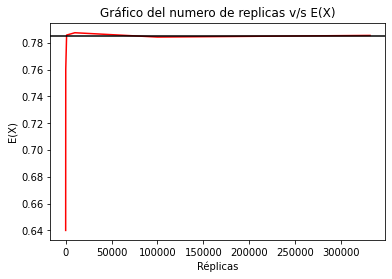

In [36]:
N_X=np.array([10,100,1000,1000,10000,100000,331489])
N_Z=np.array([10,100,1000,1000,10000,100000,1000000,1121604])
L_X=[]
tiempo_X=[]
for i in N_X:
    t0=time.time()
    Y=X(i)
    t1=time.time()
    Y=np.mean(Y)
    L_X.append(Y)
    tiempo_X.append(t1-t0)

plt.plot(N_X,L_X,color='r')
plt.axhline(np.pi/4,color='k')
plt.xlabel('Réplicas')
plt.ylabel('E(X)')
plt.title("Gráfico del numero de replicas v/s E(X)")
  

Text(0.5, 1.0, 'Tiempo vs Réplicas')

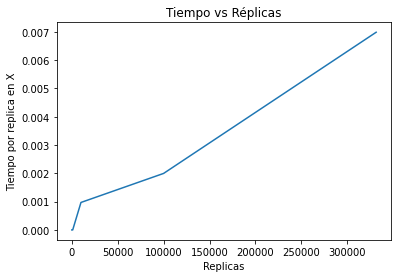

In [37]:
plt.plot(N_X,tiempo_X)
plt.xlabel('Replicas')
plt.ylabel('Tiempo por replica en X')
plt.title('Tiempo vs Réplicas')

Se observa el tiempo de ejecución a medida que aumenta la cantidad de réplicas tiene crecimiento lineal. 

### Simulación de las esperanzas de Z y costos asociados a la simulacion:

Text(0, 0.5, 'E(Z)')

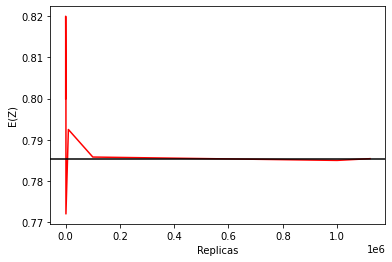

In [38]:
L_Z=[]
tiempo_Z=[]
for i in N_Z:
    t0=time.time()
    Y=Z(i)
    t1=time.time()
    Y=np.mean(Y)
    L_Z.append(Y)
    tiempo_Z.append(t1-t0)

plt.plot(N_Z,L_Z,color='r')
plt.axhline(np.pi/4,color='k')
plt.xlabel('Replicas')
plt.ylabel('E(Z)')

Text(0.5, 1.0, 'Grafico del numero de replicas v/s   Tiempo por replica para Z')

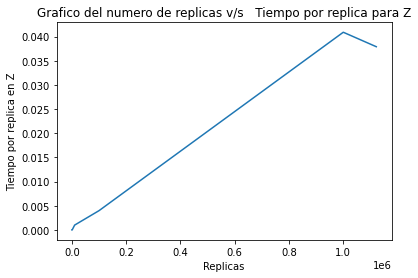

In [39]:
plt.plot(N_Z,tiempo_Z)
plt.xlabel('Replicas')
plt.ylabel('Tiempo por replica en Z')
plt.title("Grafico del numero de replicas v/s   Tiempo por replica para Z")

Se observa que el tiempo de ejecución al aumentar la cantidad de réplicas tiene crecimiento lineal. 

### Estimacion de costos

In [40]:
costo_X=sum(tiempo_X)/sum(N_X)
costo_Z=sum(tiempo_Z)/sum(N_Z)
print('costo asociado a X:',costo_X,'Costo asociado  Z:',costo_Z)

costo asociado a X: 2.2423006183776762e-08 Costo asociado  Z: 3.750514109831703e-08


### d) Calculo de intervalo de confianza, eficiencia y ratio de eficiencia:
En esta seccion se calcula el intervalo de confianza con un error de 0.001 y una probabilidad de un $99\%$ , los costos totales y a partir de ello se analizara su eficiencia y su ratio de eficiencia.

### Intervalo de confianza para X y Z:

In [41]:
intervalo_X=[L_X[-1]-2.58*np.sqrt(0.0498/N_X[-1]),L_X[-1]+2.58*np.sqrt(0.0498/N_X[-1])]
intervalo_Z=[L_Z[-1]-2.58*np.sqrt(0.1685/N_Z[-1]),L_Z[-1]+2.58*np.sqrt(0.1685/N_Z[-1])]

print('intervalo de confianza para X:', np.around(intervalo_X,4))

print('Intervalo de confianza para Z:', np.around(intervalo_Z,4))

intervalo de confianza para X: [0.7845 0.7865]
Intervalo de confianza para Z: [0.7844 0.7864]


### Costos de X, Z y ratio de eficiencia

In [42]:
print('Costo total en tiempo para X:',tiempo_X[-1],'Costo total en tiempo para Z:',tiempo_Z[-1],'Ratio de eficiencia:',tiempo_X[-1]/tiempo_Z[-1])


Costo total en tiempo para X: 0.006981611251831055 Costo total en tiempo para Z: 0.03789830207824707 Ratio de eficiencia: 0.1842196317243028


A partir de lo anteriormente mostrado se puede observar que el metodo mas eficiente es el uso del metodo de Monte Carlo asociado a la variable aleatorea X (el costo en tiempo es menor).

### e) Calculo Teorico de estimar X y Z:
A continuacion se calculara el costo teorico asociado al error y a la probabilidad de la seccion anterior.

1.-Para X sabemos que el n asociado es de 331.489 de esta forma la simulacion de su esperanza ocupa exactamente la misma cantidad de variables uniformes dado la forma en que esta definido X.

2.-Para Z su n asociado es de 1121604 y por construccion de esta ocupa el doble n variables uniformes.

A partir de lo mostrado en las secciones anteriores es posible observar que la varianza asociada a X es menor a la de Z, de esta forma X necesita una menor cantidad de replicas, lo cual implica ademas que X necesita una menor cantidad de variables uniformes siendo esta mas eficiente bajo tanto este criterio, como en el criterio de costo en tiempos,asi el metodo de monte carlo asociado a la V.a X es mejor.

En este caso, la v.a X poseia un mejor rendimiento en ambos criterios,ahora, en general el criterio a elegir puede variar dependiendo de los factores tecnicos que se posean ( RAM, GPU, otros). 

## Pregunta 3

Se programaron 3 métodos diferentes con el objetivo de simular variables aleatorias dadas. 

El primero, $DiscreteQuantile$ toma una función de masa de probabilidad discreta $f$ y un vector $u\in[0,1]^{r}$, y calcula para cada coordenada $u_{i}$ el menor $n_{i}$ tal que $\sum_{j=0}^{n_{i}}f(j)\geq u_{i}$.

El segundo, $DiscreteQuantile$, funciona de manera similar, pero toma una función de distribución de probabilidad $F$ y un vector $u\in[0,1]^{r}$, y calcula para cada coordenada $u_{i}$ el menor $n_{i}$ tal que $F(j)\geq u_{i}$.

Por último, $ContinuosQuantileF$ recibe una función de distribución $F$, su densidad $f$ y un vector $u\in[0,1]^{r}$, y a través del método de Newton-Raphson estudiado en clases calcula el vector $x\in\mathbb{R}^{r}$ tal que $|F(x_{i})-u_{i}|\leq10^{-4}$. Además, se adaptó este método para cuando se trata de una variable aleatoria discreta, es decir, donde $f$ es una función de masa de probabilidad, haciendo que cuando el valor $x_{n}$ de una iteración no sea entero, se reemplace por el valor de su función techo. Además, para evitar loops infinitos, se impone la condición de que si el algoritmo no avanza en una iteración $x_{n}=x_{n-1}$, entonces detenga el procedimiento y entregue $x_{n}$.

In [43]:
def sum_F(f,n):
    x=0
    for k in range(0,n+1):
        x+=f(k)
    return x

def stop_n(f,n,k):
    if sum_F(f,n)>=k:
        return n
    else:
        return stop_n(f,n+1,k)
    
class problema3:
    def __init__(self):
        self.error=10**-4
    
    def DiscreteQuantile(self,f,u):
        r=len(u)
        n=np.zeros(r)  
        for i in range(0,r):
            n[i]=stop_n(f,0,u[i])
        return n 
        
    def DiscreteQuantileF(self,F,u):
        r=len(u)
        n=np.zeros(r)  
        for i in range(r):
            n_i=0
            while F(n_i)<u[i]:
                n_i+=1
            n[i]=n_i
        return n


    def ContinuousQuantileF(self,F,f,u,discreta=True):
        r=len(u)
        x=np.zeros(r)
        for i in range(r):
            x_n=1
            x_n_1=0
            while (abs(F(x_n)-u[i])>self.error) and (x_n!=x_n_1):
                x_n_1=x_n
                x_n=x_n-(F(x_n)-u[i])/f(x_n)
                if discreta==True:
                    x_n=math.ceil(x_n)         
            x[i]=x_n
        return x

Estos métodos construidos se utilizarán para simular una variable aleatoria discreta $X$, la cual cumple $$\mathbb{P}(X=j)=\left(\frac{1}{2}\right)^{j}, j\geq1.$$

Para ello, se definieron las funciones $masa\_prob\_X(j)$ y $distribucion\_X(j)$, las cuales calculan la función de masa de probabilidad $f_{X}$ y la función de distribución $F_{X}$ de $X$, respectivamente, evaluadas en $j$.

In [44]:
def masa_prob_X(j):
    if j>=1 and int(j)==j: #verifica que j es mayor o igual a 1, y es entero
        return (1/2)**int(j)
    else:
        return 0
    
def distribucion_X(j):
    j_=int(j) #tiene que ser la parte entera pues X es discreta
    return sum_F(masa_prob_X,j_)   

Se procedió a simular realizaciones de la variable $X$ con los 3 distintos métodos, utilizando las mismas variables aleatorias uniformes para cada uno de ellos.

Para ello, se construyó la función $simulacion(k)$, la cual genera las $10^{k}$ réplicas de una variable uniforme $(0,1)$, evalúa los métodos anteriores utilizando estas réplicas junto a $f_{X}$ $(masa\_prob\_X)$ o $F_{X}$ $(distribucion\_X)$, según corresponda, y calcula el tiempo que tarda cada método en generar las $10^{k}$ réplicas de $X$.

In [45]:
def simulacion(k):
    sim=problema3()
    u=np.random.uniform(0,1,10**k)
    t0_a= time.time_ns()
    a=sim.DiscreteQuantile(masa_prob_X,u)
    t1_a= time.time_ns()
    tiempo_a=t1_a-t0_a
    t0_b= time.time_ns()
    b=sim.DiscreteQuantileF(distribucion_X,u)
    t1_b= time.time_ns()
    tiempo_b=t1_b-t0_b
    t0_c=time.time_ns()
    c=sim.ContinuousQuantileF(distribucion_X,masa_prob_X,u)
    #c=a
    t1_c=time.time_ns()
    tiempo_c=t1_c-t0_c
    #tiempo_c=tiempo_a
    d=[a,b,c]
    return d,tiempo_a,tiempo_b,tiempo_c

A continuación, se utiliza la función $simulacion$ para generar $10^{k}$ réplicas de $X$, con $k=1,2,3,4,5$, y se guardan tanto los valores obtenidos como los tiempos de ejecución. 

In [46]:
Simulaciones=np.zeros(5,dtype=object)
tiempo_1=np.zeros(5)
tiempo_2=np.zeros(5)
tiempo_3=np.zeros(5)

for i in range(5):
    S=simulacion(i+1)
    Simulaciones[i]=S[0] # k = i+1
    tiempo_1[i]=S[1]
    tiempo_2[i]=S[2]
    tiempo_3[i]=S[3]

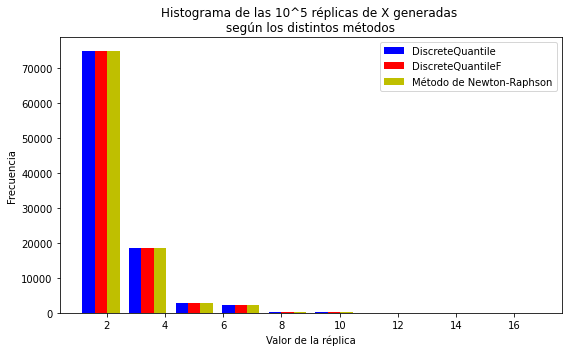

In [47]:
colors=['b','r','y']
fig, ax1 = plt.subplots(1, 1, figsize = (8,5))
ax1.hist([Simulaciones[4][0],Simulaciones[4][1],Simulaciones[4][2]],color=colors,label=['DiscreteQuantile','DiscreteQuantileF','Método de Newton-Raphson'])
plt.ylabel('Frecuencia')
plt.xlabel('Valor de la réplica')
plt.title('Histograma de las 10^5 réplicas de X generadas \n según los distintos métodos ')
ax1.legend()
plt.tight_layout()
plt.show()

Se puede observar que los 3 métodos tienen frecuencias similares en las réplicas generadas.

A modo de comparación, se calculó la diferencia absoluta entre las réplicas de $X$ generadas por el primer y segundo método (que provenían de la misma réplica uniforme), y luego se sumó el total de todas las diferencias absolutas calculadas.

El valor de esta suma (como se puede apreciar en la siguiente celda) es 0, lo que indica que el método 1 y el método 2 arrojan siempre el mismo valor para una réplica de $X$ ante el mismo valor de una réplica uniforme $(0,1).$ Esto se debe a que ambos métodos funcionan bajo la misma idea para generar la réplica de $X$, pues el primer método calcula el menor vector $n\in\mathbb{N^{r}}$ tal que $\sum_{j=1}^{n_{i}}f_{X}(j)\geq u_{i}$, pero $\sum_{j=1}^{n_{i}}f_{X}(j)=F_{X}(n_{i})$ por lo que el primer método consiste en encontrar el menor vector $n$ tal que $F_{X}(n_{i})\geq u_{i}$, lo que es exactamente la definición del segundo método.

Análogamente, se calculó la diferencia absoluta entre las réplicas de $X$ generadas por los métodos continuos (ya que son iguales) y por el método continuo, obteniendo que si bien los gráficos son similares, se observan ciertas diferencias en algunas simulaciones, pero bastante pequeñas en comparación con la cantidad de réplicas generadas.

In [48]:
sum(sum(abs(Simulaciones[k][0]-Simulaciones[k][1])) for k in range(5)) #diferencia absoluta entre los métodos 1 y 2

0.0

In [49]:
sum(sum(abs(Simulaciones[k][0]-Simulaciones[k][2])) for k in range(5)) #diferencia absoluta entre los métodos 1 y 2

161.0

Además, se graficaron los tiempos de ejecución almacenados para cada método, en función de la cantidad de réplicas simuladas, utilizando para estas una escala logarítmica de base 10, es decir, los tiempos fueron graficados en función del $k$ tal que se generaron $10^{k}$ réplicas.

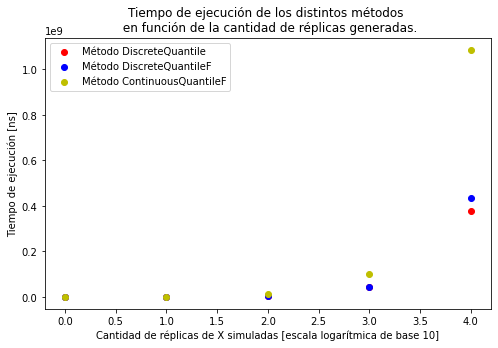

In [50]:
plt.figure(figsize=[8,5])
plt.scatter(np.arange(5),tiempo_1,color='r',label='Método DiscreteQuantile')
plt.scatter(np.arange(5),tiempo_2,color='b',label='Método DiscreteQuantileF')
plt.scatter(np.arange(5),tiempo_3,color='y',label='Método ContinuousQuantileF')
plt.xlabel('Cantidad de réplicas de X simuladas [escala logarítmica de base 10]')
plt.ylabel('Tiempo de ejecución [ns]')
plt.title('Tiempo de ejecución de los distintos métodos \n en función de la cantidad de réplicas generadas.')
plt.legend()

A través de los tiempos registrados, se calcula el costo promedio (en nanosegundos) de generar una réplica de $X$ según cada método.

In [51]:
costo1=sum(tiempo_1)/sum(10**k for k in range(1,6))
costo2=sum(tiempo_2)/sum(10**k for k in range(1,6))
costo3=sum(tiempo_3)/sum(10**k for k in range(1,6))
print('Costo promedio de generar una réplica de X a través de DiscreteQuantile: '+str(costo1),'nanosegundos.')
print('Costo promedio de generar una réplica de X a través de DiscreteQuantileF: '+str(costo2),'nanosegundos.')
print('Costo promedio de generar una réplica de X a través de ContinuosQuantileF: '+str(costo3),'nanosegundos.')

Costo promedio de generar una réplica de X a través de DiscreteQuantile: 3788.140581405814 nanosegundos.
Costo promedio de generar una réplica de X a través de DiscreteQuantileF: 4326.49446494465 nanosegundos.
Costo promedio de generar una réplica de X a través de ContinuosQuantileF: 10773.322833228332 nanosegundos.


Se puede observar que los métodos $DiscreteQuantile$ y $DiscreteQuantileF$ son más eficientes que el método $ContinuousQuantileF$, debido a que este realiza múltiples iteraciones para poder encontrar el vector $x$, y va avanzando de "a poco" en cada iteración (en comparación de los otros dos métodos), además de tener mayor complejidad y evaluaciones en los cálculos.

También observa una pequeña diferencia entre los costos de los dos métodos discretos, resultando más eficiente el método $DiscreteQuantile$, sin embargo, esta diferencia en el costo se debe únicamente a costos computacionales prácticos (la implementación con *while* en el segundo método toma más tiempo que las operaciones computacionales del primer método), pues como ya dijimos, ambos métodos funcionan de la misma manera para simular las réplicas de $X$.

Ahora, se generarán $10^{k}$ réplicas de $X$ mediante el método más eficiente, i.e, el método $DiscreteQuantile$, para $k=1,2,3,4,5,$ con el objetivo de estimar el valor esperado de $X$ utilizando el método de Monte Carlo, es decir, calculando su media muestral. Además, se calcularán las varianzas muestrales.

Antes de eso, cabe notar que la variable aleatoria $X$ distribuye como una geométrica con valores en {1,2,...} de parámetro $p=1/2$. Del cursos de probabilidades, sabemos que si $Y\sim Geo(p)$ entonces $\mathbb{E}(Y)=1/p$ y $\mathbb{Var}(Y)=(1-p)/p^{2},$ con lo que tenemos que $\mathbb{E}(X)=2$ y $\mathbb{Var}(X)=2.$

A continuación, se generan las réplicas para los diferentes $k$, y se muestran los valores de las medias y varianzas muestrales calculados. Además, se generan gráficos que permiten evidenciar de mejor manera la evolución de los valores muestrales de la media y la varianza, y se comparan con los valores reales.

In [52]:
medias=np.zeros(5)
var=np.zeros(5)
for i in range(5):
    Sim=simulacion(i+1)[0][0]
    medias[i]=np.mean(Sim)
    var[i]=np.var(Sim)
    print(f'Muestra de tamaño 10^{i+1}: Media={np.around(medias[i],3)}, Varianza={np.around(var[i],3)}')

Muestra de tamaño 10^1: Media=2.3, Varianza=2.01
Muestra de tamaño 10^2: Media=2.04, Varianza=1.898
Muestra de tamaño 10^3: Media=1.961, Varianza=2.069
Muestra de tamaño 10^4: Media=2.006, Varianza=2.023
Muestra de tamaño 10^5: Media=2.005, Varianza=2.03


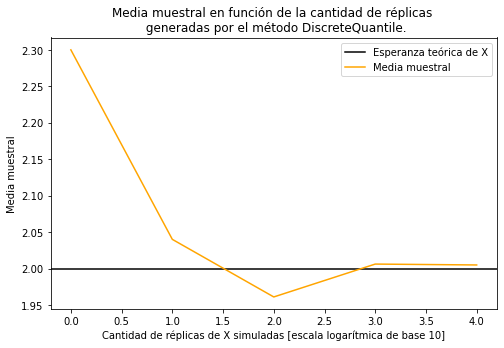

In [53]:
plt.figure(figsize=[8,5])
plt.axhline(2,label='Esperanza teórica de X',color='k')
plt.plot(np.arange(0,5),medias,label='Media muestral',color='orange')
plt.xlabel('Cantidad de réplicas de X simuladas [escala logarítmica de base 10]')
plt.ylabel('Media muestral')
plt.title('Media muestral en función de la cantidad de réplicas \n generadas por el método DiscreteQuantile.')
plt.legend()

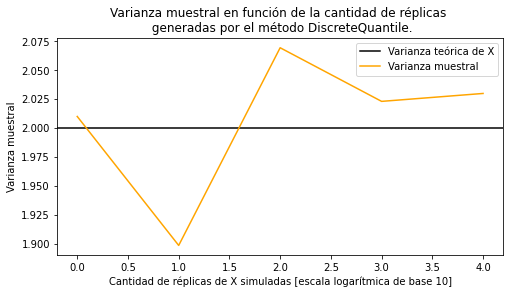

In [54]:
plt.figure(figsize=[8,4])
plt.axhline(2,label='Varianza teórica de X',color='k')
plt.plot(np.arange(0,5),var,label='Varianza muestral',color='orange')
plt.xlabel('Cantidad de réplicas de X simuladas [escala logarítmica de base 10]')
plt.ylabel('Varianza muestral')
plt.title('Varianza muestral en función de la cantidad de réplicas \n generadas por el método DiscreteQuantile.')
plt.legend()

A través de distintas simulaciones, se pudo evidenciar que, tal como lo indica la teoría, a medida que se considera un $k$ más grande, i.e., se consideran más réplicas para estimar $\mathbb{E}(X)$ y $\mathbb{Var}(X)$, los valores calculados tienden a ser más cercanos a los valores teóricos.

## Pregunta 4


Para esta pregunta se consideró la variable aleatoria discreta $Y_{\lambda,s}$, la cual tiene su función de masa de probabilidad $f_{Y}$ dada por $$f_{Y}(k)=\mathbb{P}(Y_{\lambda,s}=k)=\frac{e^{-\lambda}\lambda^{k}/k!}{\sum_{j=0}^{s}e^{-\lambda}\lambda^{j}/j!}$$ para $k=0,1,...,s.$ 

### a)

#### Método Uniforme Discreta

Se construyó un método para simular la variable $Y_{\lambda,s}$ a través de variables uniformes, el cual consiste en dividir el intervalo [0,1] en $s$ intervalos de igual largo, y luego se selecciona solamente uno de ellos, el cual será llamado $I_{1}$ a través de una uniforme discreta $U_{1}$ de parámetro $s$, con $I_{1}=[\frac{U_{1}-1}{s},\frac{U_{1}}{s}]$. 

Luego, si se obtiene que un intervalo $[F_{k-1},F_{k}]$ (con F la distribución de $Y_{\lambda,s}$) que contenga a $I_{1}$, entonces el valor de $Y$ (variable simulada) será $k$. Si no se logra obtener este intervalo, se divide $I_{1}$ en $s$ sub-intervalos de igual largo ($1/s^{2}$), y se selecciona un sub-intervalo $I_{2}$ a través de una uniforme discreta $U_{2}$, con $I_{2}=\frac{U-1}{s}+[\frac{U_{2}-1}{s^{2}},\frac{U_{2}}{s^{2}}]$, y se vuelve a repetir la idea. 

Así, el algoritmo consiste en encontrar un intervalo $I_{n}$ aleatorio, contenido en algún $[F(k-1),F(k)]$, para algún $n$, y cuando ocurra, entonces tendremos que $Y$ toma el valor $k$. Intuitivamente, sumando para todo $n$ en los naturales, tenemos que $\mathbb{P}(Y=k)=\mathbb{P}(I_{n}$ esté contenido en $[F(k-1),F(k)]$ para algún $n)=F(k)-F(k-1)=\mathbb{P}(Y_{\lambda,s}=k)$ debido a la uniformidad de los $U_{n}$.

In [55]:
# Método utilizando variables uniformes discretas
def Y_uniforme(Lambda,s,n):
    F_k=np.zeros(s+1)
    F_k=poisson(Lambda).cdf(np.arange(0,s+1))/poisson(Lambda).cdf(s)
    Y=np.zeros(n)
    suma=0
    for j in range(n):
        i=0
        k=-1
        F=0
        A=0
        while F<A+1/s**i:
            i+=1
            U=np.random.randint(1,s+1)
            suma+=1
            A+=(U-1)/s**i
            while F_k[k+1]<=A:
                k+=1
            F=F_k[k+1]
            
        Y[j]=k+1
    return Y,suma


#### Método Poisson

Recordando que una variable Poisson $X$ de parámetro $\lambda$ cumple que $\mathbb{P}(X=k)=e^{-\lambda}\lambda^{k}/k!$, es fácil notar que $Y_{\lambda,s}$ es una variable de Poisson "acotada", en el sentido que sólo puede tomar valores menores o igual a $s$, y el denominador de $f_{Y}$ es una constante normalizadora para que $f_{Y}$ sea efectivamente una función de masa de probabilidad (sume 1), la cual corresponde a la probabilidad acumulada en el conjunto {0,1,2,...,s}. Así, $Y_{\lambda,s}$ es una variable de Poisson condicionada a que pertenezca al conjunto {0,1,2,...,s}, por lo que $Y_{\lambda,s}\sim\mathcal{L}(X|X\in\{0,1,...,s\})$, con $X\sim Poisson(\lambda).$ Por corolario visto en clases, si tenemos $(X_{n})_{n\geq1}$ i.i.d. tales que $X_{1}\sim Poisson(\lambda)$ y $N:=\inf\{n\geq1:X_{n}\in\{0,1,...,s\}\}$, entonces $X_{N}\sim\mathcal{L}(X|X\in\{0,1,...,s\})$, es decir, $\mathcal{L}(X_{N})=\mathcal{L}(Y_{\lambda,s})$, y con ello, si generamos $X_{N}$ obtenemos una réplica de $Y_{\lambda,s}.$

Así, se programó la función $Y\_poisson(\lambda,s,n)$ que genera $n$ réplicas de $X_{N}$, y con ello, $n$ réplicas de $Y_{\lambda,s}$. Intuitivamente, el método genera una réplica de $X_{N}$ simulando variables de Poisson de parámetro $\lambda$, hasta que alguna pertenezca al conjunto {0,1,...,s}, y el valor que tome esa última réplica de $X\sim Poisson(\lambda)$ se toma como réplica de $X_{N}.$

Además, cada variable de Poisson es genera como se vio en clases: $X:=\sup\{k\geq0:-\sum_{i=0}^{k}ln(U_{i})<\lambda\}$ donde $(U_{j})_{j\geq0}$ son i.i.d. y $U_{0}\sim Unif(0,1).$ Para ello, se creó la función $Poisson(\lambda)$ la cual genera variables uniformes (0,1) hasta que se cumpla la condición $-\sum_{i=0}^{k}ln(U_{i})<\lambda$ y toma como una réplica de $X$ el número de uniformes generadas (tomando la primera uniforme generada como la número 0).

Así, el método implementado se muestra a continuación:

In [56]:
def Poisson(Lambda):
    k=0
    U=np.random.uniform(0,1)
    suma=np.log(U)
    while -suma<Lambda:
        U=np.random.uniform(0,1)
        suma+=np.log(U)
        k+=1
    return k
    
# Método usando poisson
def Y_poisson(Lambda,s,n):
    Y=np.zeros(n)
    suma=0
    for i in range(n):
        X=s+1
        while X>s:
            X=Poisson(Lambda)
            suma+=X
        Y[i]=X
    return Y,suma

Para evaluar los métodos y calcular su eficiencia, se consideró $\lambda=1$ y $s=8$, y se generan $10^{5}$ réplicas por cada método, guardando el tiempo de ejecución $t_{método}$, para luego estimar el costo numérico por réplica según cada método mediante la fórmula $C_{método}=T_{método}/10^{5}.$ 

A continuación se muestra un histograma donde se muestran las frecuencias de las réplicas generadas.

In [57]:
n=100000
Lambda=1
s=8
t0_poisson=time.time_ns()
replicas_poisson=Y_poisson(Lambda,s,n)[0]
t1_poisson=time.time_ns()
costo_poisson=(t1_poisson-t0_poisson)/n
t0_unif=time.time_ns()
replicas_unif=Y_uniforme(Lambda,s,n)[0]
t1_unif=time.time_ns()
costo_unif=(t1_unif-t0_unif)/n

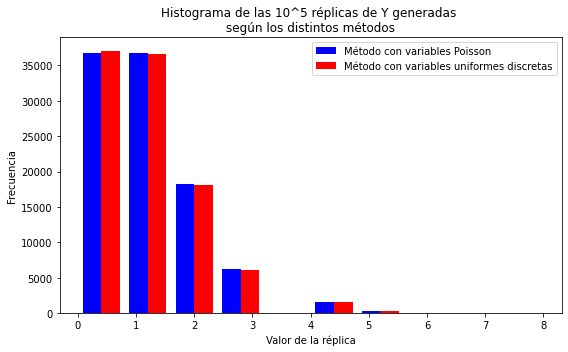

In [58]:
fig, ax1 = plt.subplots(1, 1, figsize = (8,5))
ax1.hist([replicas_poisson,replicas_unif],color=['b','r'],label=['Método con variables Poisson','Método con variables uniformes discretas'])
plt.ylabel('Frecuencia')
plt.xlabel('Valor de la réplica')
plt.title('Histograma de las 10^5 réplicas de Y generadas \n según los distintos métodos ')
ax1.legend()
plt.tight_layout()
plt.show()

Ahora, se muestran los costos por réplica numéricos estimados a través de estas simulaciones:

In [59]:
print('El costo por réplica del método con variables de Poisson es de',costo_poisson,'nanosegundos.')
print('El costo por réplica del método con variables uniformes discretas es de',costo_unif,'nanosegundos.')

El costo por réplica del método con variables de Poisson es de 7749.162 nanosegundos.
El costo por réplica del método con variables uniformes discretas es de 6003.858 nanosegundos.


### b)
En lo que sigue se pretende estimar la esperanza de la v.a Y con una precision de 0.2 y un nivel de confianza del 95%.
Se usara un analisis identico al realizado en la pregunta 2.

### Metodo de Uniformes: Cantidad de réplicas necesarias, varianza y media teóricas y simuladas .

#### Estimacion de la varianza

In [60]:
q=100000
var_Y_u=np.var(Y_uniforme(1,8,q)[0],ddof=1)
n_1=var_Y_u*1.96**2/(0.2)**2
print(var_Y_u)
print(n_1)

1.0062105772057721
96.63646383484233


#### Estimación de la Esperanza

Text(0.5, 1.0, 'Grafico del numero de replicas v/s E(Y_Uniforme)')

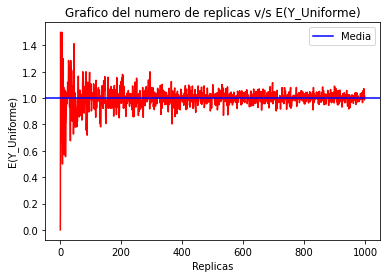

In [61]:
N_Y_u=np.arange(1,1000)
L_Y_u=[]
n_uniformes_u=[]
tiempo_Y_u=[]
for i in N_Y_u:
    t0=time.time()
    Y=Y_uniforme(1,8,i)[0]
    t1=time.time()
    Y=np.mean(Y)
    L_Y_u.append(Y)
    tiempo_Y_u.append(t1-t0)
    n_u=Y_uniforme(1,8,i)[1]
    n_uniformes_u.append(n_u)

plt.plot(N_Y_u,L_Y_u,color='r')
plt.axhline(np.mean(np.array(L_Y_u)),color='b',label='Media')
plt.xlabel('Replicas')
plt.ylabel('E(Y_Uniforme)')
plt.legend()
plt.title("Grafico del numero de replicas v/s E(Y_Uniforme)")

Se puede observar que entre más cantidad de réplicas simuladas con este método, el valor de la esperanza ha estimar se acerca al valor teórico, el cuál es 1. 

#### Metodo de Poisson: Cantidad de réplicas necesarias, varianza y media teoricas y simuladas .

#### Estimación de la Varianza

In [62]:
q=100000
var_Y_p=np.var(Y_poisson(1,8,q)[0],ddof=1)
n_2=var_Y_p*1.96**2/(0.2)**2
print(var_Y_p)
print(n_2)

1.0037709856098564
96.40216545797058


#### Estimación de la Esperanza

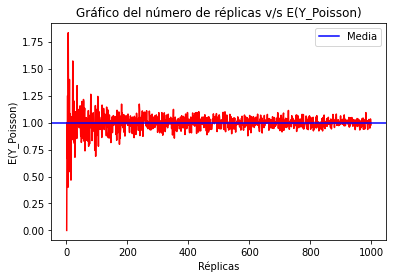

In [63]:
N_Y_p=np.arange(1,1000)
L_Y_p=[]
tiempo_Y_p=[]
n_uniformes_p=[]
for i in N_Y_p:
    t0=time.time()
    Y=Y_poisson(1,8,i)[0]
    t1=time.time()
    Y=np.mean(Y)
    L_Y_p.append(Y)
    tiempo_Y_p.append(t1-t0)
    n_u=Y_poisson(1,8,i)[1]
    n_uniformes_p.append(n_u)

plt.plot(N_Y_p,L_Y_p,color='r')
plt.xlabel('Réplicas')
plt.ylabel('E(Y_Poisson)')
plt.axhline(np.mean(np.array(L_Y_p)),color='b',label='Media')
plt.title("Gráfico del número de réplicas v/s E(Y_Poisson)")
plt.legend()

Se puede observar que entre más cantidad de réplicas simuladas con este método, el valor de la esperanza ha estimar se acerca al valor teórico, el cuál es 1.

### Comparación de resultados

#### Tiempo de ejecución

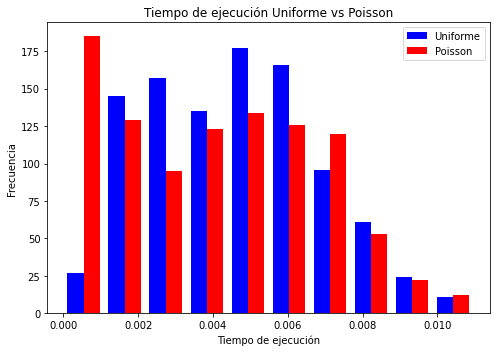

In [64]:
colors=['b','r']
fig, ax1 = plt.subplots(1, 1, figsize = (7,5))
ax1.hist([tiempo_Y_u,tiempo_Y_p],color=colors,label=['Uniforme','Poisson'])
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo de ejecución')
plt.title('Tiempo de ejecución Uniforme vs Poisson')
ax1.legend()
plt.tight_layout()
plt.show()

Se observa que el método que utiliza las variables Poisson es más rápido que el método que usa variables uniformes discretas en la mayoría de los casos. Esto se debe a que el método con uniformes discretas hace uso de dos while's, lo que aumenta su complejidad computacional. 

#### Cantidad de variables uniformes ocupadas

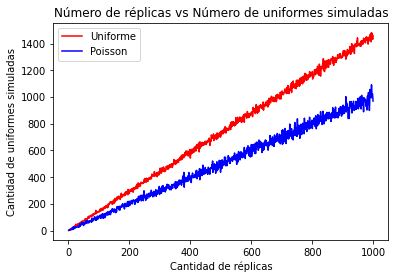

In [65]:
plt.plot(N_Y_p,n_uniformes_u,color='r',label='Uniforme')
plt.plot(N_Y_p,n_uniformes_p,color='b',label='Poisson')
plt.ylabel('Cantidad de uniformes simuladas')
plt.xlabel('Cantidad de réplicas')
plt.title('Número de réplicas vs Número de uniformes simuladas')
plt.legend()

Se observa que en ambos casos la cantidad de variables uniformes utilizadas para generar cada método de simulación tienen crecimiento lineal, teniendo menor pendiente el método que utiliza variables poisson. Esto se debe a que las variables de poisson concentran la mayor masa al principio, lo que hace requerir menos variables uniformes para cumplir con la condición.

#### Tabla Resumen

In [66]:
Resultados= pd.DataFrame([[n_1,var_Y_u,np.mean(L_Y_u)],[n_2,var_Y_p,np.mean(L_Y_p)]],columns=['Cantidad de Réplicas','Varianza','Media'])

Resultados

,Cantidad de Réplicas,Varianza,Media
0,96.636464,1.006211,0.99774
1,96.402165,1.003771,0.99587


Se puede observar que con ambos métodos se consiguen una varianza y una media prácticamente iguales.
Además, la cantidad de réplicas mínima para estimar la esperanza con una precisión de 0.2 y nivel de confianza del 95% es 96 en ambos métodos. 